IU5-23M lab3Чжоу Хан

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import scipy.stats as stats
import six
import sys
from sklearn.impute import SimpleImputer
sys.modules['sklearn.externals.six'] = six
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

In [8]:
data_load = pd.read_csv(r'C:\Users\zhouhang\Desktop\imdb_top_1000.csv', sep=",")
data_load.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [9]:
data_load.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [10]:
data = data_load[["IMDB_Rating", "Meta_score", "No_of_Votes"]]

In [11]:
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=data.columns)
    return res

a) Масштабируем нормализацией по средним. Mean Normalization.

In [12]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = param_df.mean(axis=0)
        maxs = param_df.max(axis=0)
        mins = param_df.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [13]:
data_mn_scale = MeanNormalisation().fit_transform(data)
data_mn_scale.head()

,IMDB_Rating,Meta_score,No_of_Votes
0,0.794529,0.028173,0.892751
1,0.735706,0.305951,0.580958
2,0.618059,0.083729,0.875548
3,0.618059,0.167062,0.369392
4,0.618059,0.250395,0.179529


In [14]:
data_mn_scale.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1.000000e+03,8.430000e+02,1.000000e+03
mean,-5.887901e-15,7.628668e-17,-5.179190e-17
std,1.620537e-01,1.718903e-01,1.412293e-01
min,-2.054706e-01,-6.940490e-01,-1.072487e-01
25%,-1.466471e-01,-1.107157e-01,-9.411760e-02
50%,-2.900000e-02,1.428430e-02,-5.830161e-02
75%,8.864706e-02,1.253954e-01,4.334227e-02
max,7.945294e-01,3.059510e-01,8.927513e-01


In [15]:
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

In [16]:
def draw_graph(col_list, data1, data2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20,6))
    ax1.set_title(label1)
    sns.kdeplot(data=data1[col_list], ax=ax1)  
    ax2.set_title(label2)
    sns.kdeplot(data=data2[col_list], ax=ax2)
    plt.show()

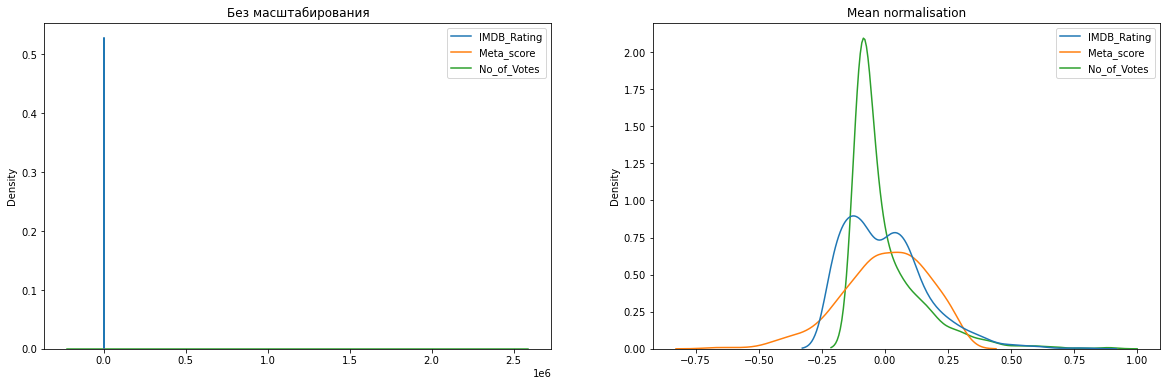

In [17]:
draw_graph(['IMDB_Rating', 'Meta_score','No_of_Votes'], data, data_mn_scale,'Без масштабирования', )

b) Масштабирование по медиане

In [18]:
rs = RobustScaler()
data_median_scale_arr = rs.fit_transform(data)
data_median_scale = arr_to_df(data_median_scale_arr)
data_median_scale.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1000.000000
mean,0.123250,-0.060498,0.424135
std,0.688728,0.728006,1.027422
min,-0.750000,-3.000000,-0.356083
25%,-0.500000,-0.529412,-0.260556
50%,0.000000,0.000000,0.000000
75%,0.500000,0.470588,0.739444
max,3.500000,1.235294,6.918768


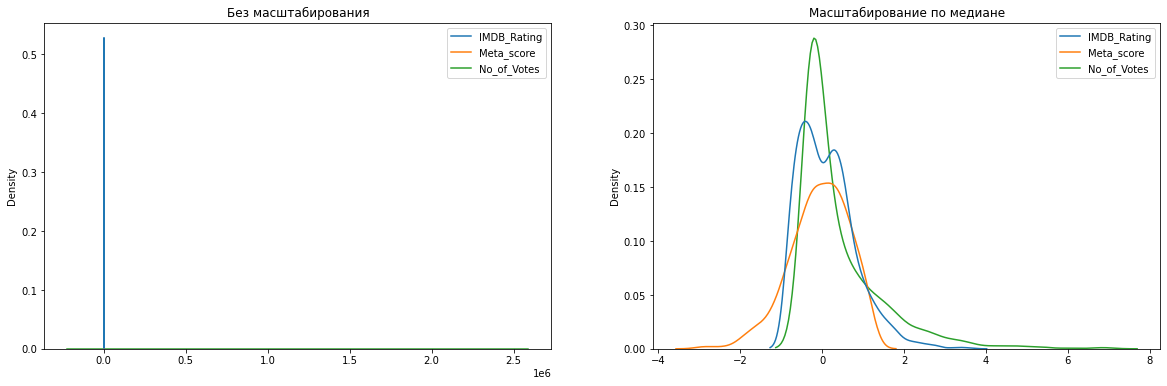

In [22]:
draw_graph(['IMDB_Rating', 'Meta_score','No_of_Votes'], data, data_median_scale,'Без масштабирования', 'Масштабирование по медиане', )

с) Масштабирование по максимальному значению

In [108]:
from sklearn.preprocessing import MaxAbsScaler

In [109]:
mas = MaxAbsScaler()
data_max_scale_arr = mas.fit_transform(data)
data_max_scale = arr_to_df(data_max_scale_arr)
data_max_scale.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1000.000000
mean,0.913356,0.780421,0.294368
std,0.030449,0.121481,0.297702
min,0.873563,0.445000,0.029442
25%,0.885057,0.700000,0.065163
50%,0.908046,0.790000,0.162594
75%,0.931034,0.870000,0.439098
max,1.000000,1.000000,1.000000


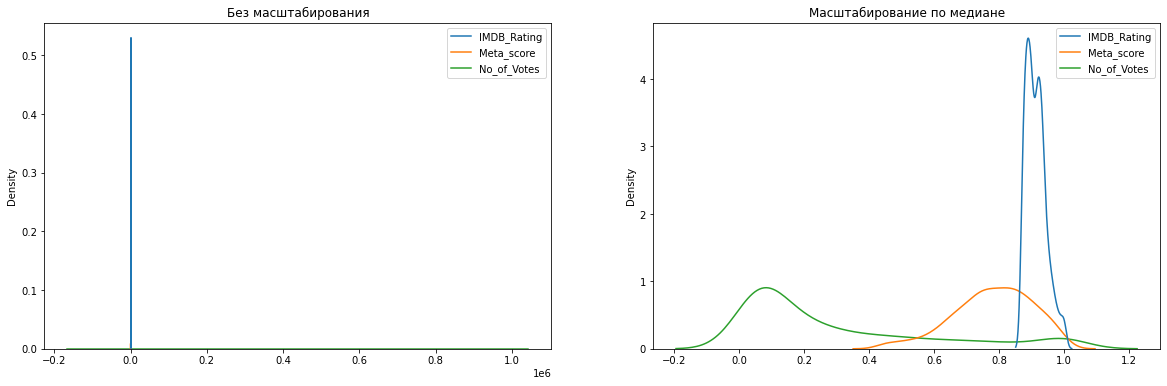

In [110]:
draw_graph(['IMDB_Rating', 'Meta_score','No_of_Votes'], data, data_max_scale,'Без масштабирования','Масштабирование по медиане', )

Обработка выбросов

In [23]:
col_list = ['IMDB_Rating', 'Meta_score','No_of_Votes']
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

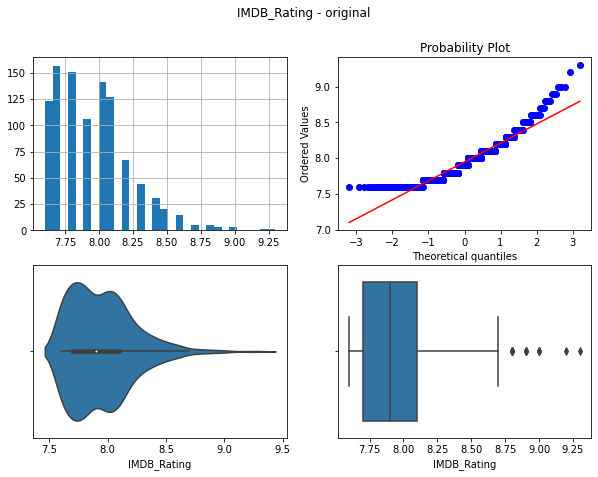

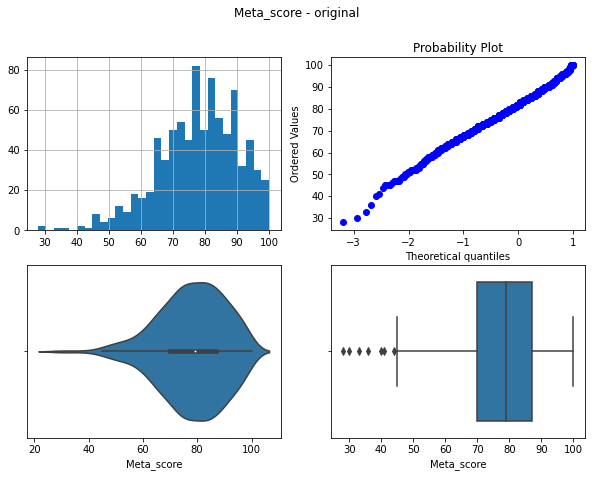

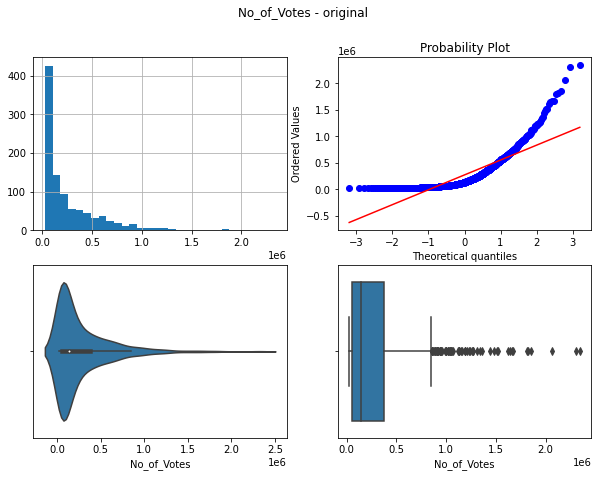

In [24]:
for col in col_list:
    diagnostic_plots(data, col, '{} - original'.format(col))

Удаление методом межквартильного размаха

In [25]:
#создадим функцию обнаружения выбросов только для метода межквартильного размаха
def get_outlier_boundaries(df, col):
    K2 = 1.5
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
    upper_boundary = df[col].quantile(0.75) + (K2 * IQR)
    return lower_boundary, upper_boundary 

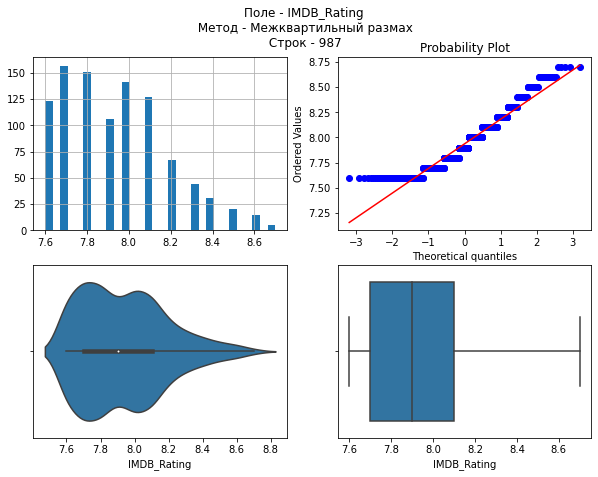

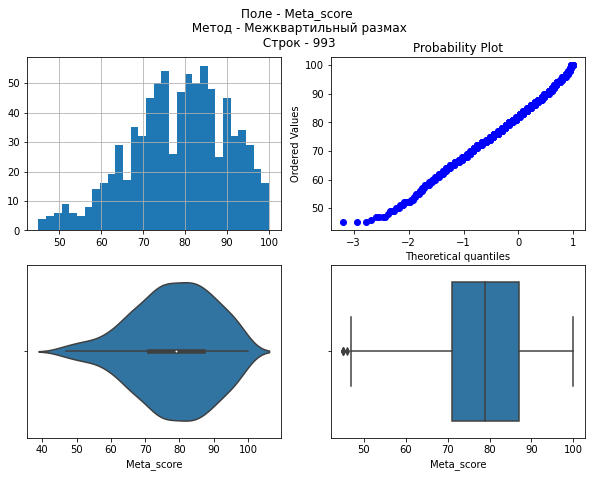

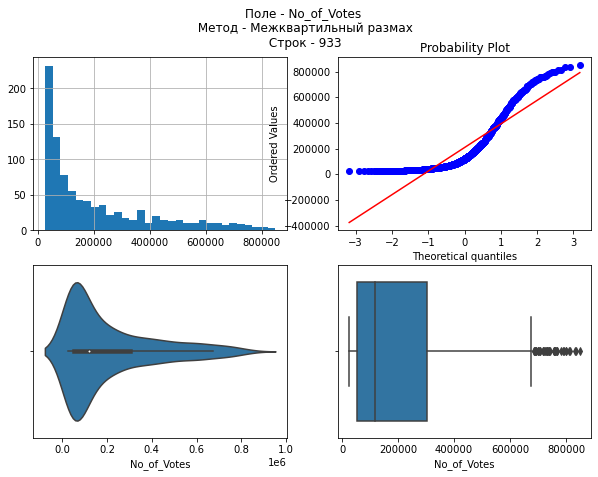

In [26]:
obt = 'Межквартильный размах'
for col in col_list:
    # Вычисление верхней и нижней границы
    lower_boundary, upper_boundary = get_outlier_boundaries(data, col)
    # Флаги для удаления выбросов
    outliers_temp = np.where(data[col] > upper_boundary, True, 
                            np.where(data[col] < lower_boundary, True, False))
    # Удаление данных на основе флага
    data_trimmed = data.loc[~(outliers_temp), ]  
    title = 'Поле - {}\n Метод - {}\n Строк - {}'.format(col, obt, data_trimmed.shape[0])
    diagnostic_plots(data_trimmed, col, title)

Замена выбросов методом трёх сигм

In [27]:
def get_outlier_boundaries_sigm(df, col):
    K1 = 3
    lower_boundary = df[col].mean() - (K1 * df[col].std())
    upper_boundary = df[col].mean() + (K1 * df[col].std())
    return lower_boundary, upper_boundary 

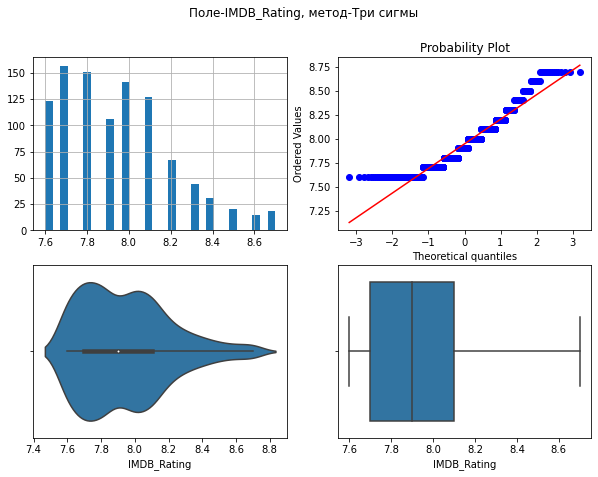

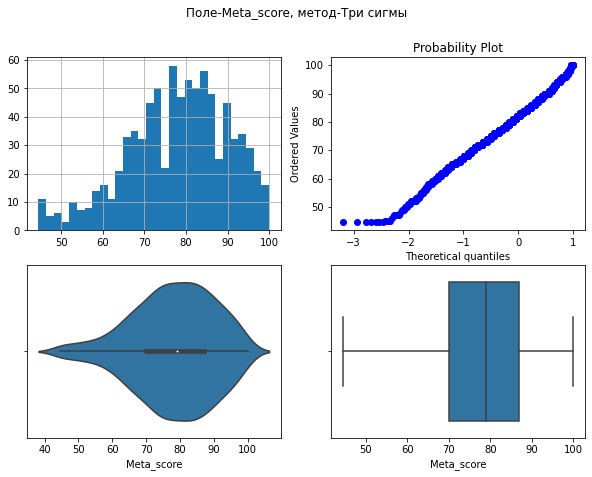

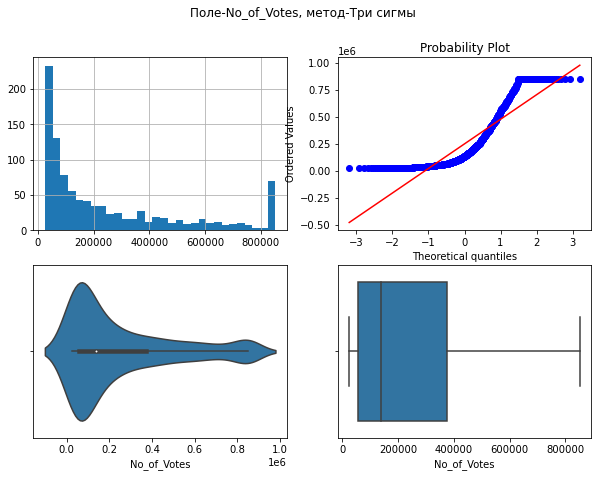

In [28]:
obt2 = 'Три сигмы'
for col in col_list:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt2)
        diagnostic_plots(data, col, title)

Обработка нестандартных признаков

In [29]:
data_in = pd.read_csv(r'C:\Users\zhouhang\Desktop\imdb_top_1000.csv', sep = ',')

In [33]:
data_input = data_in.iloc[0:500, :]

In [34]:
data_input

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,https://m.media-amazon.com/images/M/MV5BMzQ5NG...,The Man from Earth,2007,NaN,87 min,"Drama, Fantasy, Mystery",7.9,An impromptu goodbye party for Professor John ...,NaN,Richard Schenkman,David Lee Smith,Tony Todd,John Billingsley,Ellen Crawford,174125,NaN
496,https://m.media-amazon.com/images/M/MV5BMjE0Nz...,Letters from Iwo Jima,2006,UA,141 min,"Action, Adventure, Drama",7.9,The story of the battle of Iwo Jima between th...,89.0,Clint Eastwood,Ken Watanabe,Kazunari Ninomiya,Tsuyoshi Ihara,Ryô Kase,154011,"13,756,082"
497,https://m.media-amazon.com/images/M/MV5BMjAzOD...,The Fall,2006,R,117 min,"Adventure, Drama, Fantasy",7.9,In a hospital on the outskirts of 1920s Los An...,64.0,Tarsem Singh,Lee Pace,Catinca Untaru,Justine Waddell,Kim Uylenbroek,107290,"2,280,348"
498,https://m.media-amazon.com/images/M/MV5BNTg2OT...,Life of Pi,2012,U,127 min,"Adventure, Drama, Fantasy",7.9,A young man who survives a disaster at sea is ...,79.0,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain,Tabu,580708,"124,987,023"


In [35]:
#def substr_in_url(substr):
    #lsubstr = substr.lower()
    #return data_load.apply(lambda x: 1 if lsubstr in x['url'].lower() else 0, axis=1)

In [36]:
#data_load['is_get'] = substr_in_url('GET')
#data_load['is_php'] = substr_in_url('PHP')
#data_load['is_js'] = substr_in_url('JS')
#data_load['is_woff'] = substr_in_url('WOFF')
#url_features = ['is_get', 'is_php', 'is_js', 'is_woff']

In [38]:
#приводим колонку с датой и временем к форме, понятной Datetime
data_input['Released_Year'] = data_input.apply(lambda x: pd.to_datetime(x['Released_Year'], format='%Y-%m-%d %H:%M:%S'), axis=1)

In [40]:
# День
data_input['day'] = data_input['Released_Year'].dt.day
# Месяц
data_input['month'] = data_input['Released_Year'].dt.month
# Год
data_input['year'] = data_input['Released_Year'].dt.year
# Часы
data_input['hour'] = data_input['Released_Year'].dt.hour
#Минуты
data_input['minute'] = data_input['Released_Year'].dt.minute
#Секунды
data_input['second'] = data_input['Released_Year'].dt.second
#Неделя года
data_input['week'] = data_input['Released_Year'].dt.isocalendar().week

In [41]:
# Создадим масштабируемые признаки для дальнейших экспериментов
dt_features = ['year', 'day', 'month', 'hour', 'minute', 'second', 'week']
dt_features_scaled = []
for f in dt_features:
    f_new = str(f + '_scaled')
    dt_features_scaled.append(f_new)
    data_input[f_new] = MinMaxScaler().fit_transform(data_input[[f]])
dt_features_scaled

['year_scaled',
 'day_scaled',
 'month_scaled',
 'hour_scaled',
 'minute_scaled',
 'second_scaled',
 'week_scaled']

In [42]:
#функция кодировки значения синусом или косинусом
def round_code(v, T, cos_flag = True):
    x = 2*np.pi*v/T
    if cos_flag:
        return np.cos(x)
    else:
        return np.sin(x)

In [43]:
# Опеределим периоды для признаков
for f in dt_features:
    print(f, data_input[f].min(), data_input[f].max())

year 1920 2020
day 1 1
month 1 1
hour 0 0
minute 0 0
second 0 0
week 1 53


In [44]:
dt_features_periods = [0, 31, 12, 24, 60, 60, 52]

In [45]:
#Датафрейм большой и при его фрагментации нам попались только значения из 2010 года, поэтому колонку года не кодируем
# объявлем dt_features_round пустым, чтобы инициировать массив для дальнейшей работы с ним
dt_features_round = [] 

In [46]:
%%time
# Построим отображение признаков на круг, год пропускаем
for f,p in zip(dt_features[1:], dt_features_periods[1:]):
    f_cos = str(f + '_cos')
    f_sin = str(f + '_sin')
    data_input[f_cos] = data_input.apply(lambda x: round_code(x[f], p), axis=1)
    data_input[f_sin] = data_input.apply(lambda x: round_code(x[f], p, False), axis=1)
    dt_features_round.append(f_cos)
    dt_features_round.append(f_sin)
dt_features_round    

Wall time: 48.1 ms


['day_cos',
 'day_sin',
 'month_cos',
 'month_sin',
 'hour_cos',
 'hour_sin',
 'minute_cos',
 'minute_sin',
 'second_cos',
 'second_sin',
 'week_cos',
 'week_sin']

In [47]:
data_input

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,month_cos,month_sin,hour_cos,hour_sin,minute_cos,minute_sin,second_cos,second_sin,week_cos,week_sin
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994-01-01,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,...,0.866025,0.5,1.0,0.0,1.0,0.0,1.0,0.0,1.000000,6.432491e-16
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972-01-01,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,...,0.866025,0.5,1.0,0.0,1.0,0.0,1.0,0.0,1.000000,6.432491e-16
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008-01-01,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,...,0.866025,0.5,1.0,0.0,1.0,0.0,1.0,0.0,0.992709,1.205367e-01
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974-01-01,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,...,0.866025,0.5,1.0,0.0,1.0,0.0,1.0,0.0,0.992709,1.205367e-01
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957-01-01,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,...,0.866025,0.5,1.0,0.0,1.0,0.0,1.0,0.0,0.992709,1.205367e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,https://m.media-amazon.com/images/M/MV5BMzQ5NG...,The Man from Earth,2007-01-01,NaN,87 min,"Drama, Fantasy, Mystery",7.9,An impromptu goodbye party for Professor John ...,NaN,Richard Schenkman,...,0.866025,0.5,1.0,0.0,1.0,0.0,1.0,0.0,0.992709,1.205367e-01
496,https://m.media-amazon.com/images/M/MV5BMjE0Nz...,Letters from Iwo Jima,2006-01-01,UA,141 min,"Action, Adventure, Drama",7.9,The story of the battle of Iwo Jima between th...,89.0,Clint Eastwood,...,0.866025,0.5,1.0,0.0,1.0,0.0,1.0,0.0,1.000000,6.432491e-16
497,https://m.media-amazon.com/images/M/MV5BMjAzOD...,The Fall,2006-01-01,R,117 min,"Adventure, Drama, Fantasy",7.9,In a hospital on the outskirts of 1920s Los An...,64.0,Tarsem Singh,...,0.866025,0.5,1.0,0.0,1.0,0.0,1.0,0.0,1.000000,6.432491e-16
498,https://m.media-amazon.com/images/M/MV5BNTg2OT...,Life of Pi,2012-01-01,U,127 min,"Adventure, Drama, Fantasy",7.9,A young man who survives a disaster at sea is ...,79.0,Ang Lee,...,0.866025,0.5,1.0,0.0,1.0,0.0,1.0,0.0,1.000000,6.432491e-16


Отбор признаков

In [84]:
#Методы, основанные на корреляции
fs_data = pd.read_csv(r'C:\Users\zhouhang\Desktop\glass.csv', sep=',')
fs_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<AxesSubplot:>

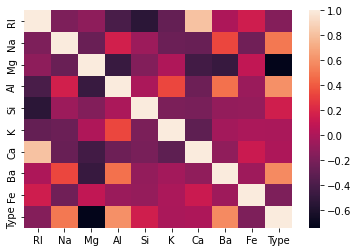

In [85]:
sns.heatmap(fs_data.corr(), annot=False, fmt='.3f')

In [86]:
cr = fs_data.corr()
cr = cr.abs().unstack() 
cr = cr.sort_values(ascending=False)
cr = cr[cr >= 0.8]
cr = cr[cr < 1]
cr = pd.DataFrame(cr).reset_index()
cr.columns = ['f1', 'f2', 'corr']
cr

,f1,f2,corr
0,RI,Ca,0.810403
1,Ca,RI,0.810403


In [88]:
#Метод обратный Sequential Feature Selector (Методы обертывания)

fs2_data = pd.read_csv(r'C:\Users\zhouhang\Desktop\imdb_top_1000.csv', sep=',')
fs2_data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [89]:
raw_data_with_na = [c for c in fs2_data.columns if fs2_data[c].isnull().sum() > 0]
[(c, fs2_data[c].isnull().sum()) for c in raw_data_with_na]

[('Certificate', 101), ('Meta_score', 157), ('Gross', 169)]

In [90]:
fs2_data = fs2_data.dropna()

In [94]:
pip install category

Note: you may need to restart the kernel to use updated packages.


In [95]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [96]:
from category_encoders.count import CountEncoder as ce_CountEncoder

In [97]:
#Кодируем категориальные признаки
CE1 = ce_CountEncoder()
encoded_data = CE1.fit_transform(fs2_data[fs2_data.columns])
encoded_data

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,1,12,174,4,58,9.3,1,80.0,2,1,1,1,1,2343110,1
1,1,1,4,174,1,19,9.2,1,100.0,5,2,3,1,2,1620367,1
2,1,1,17,142,6,18,9.0,1,84.0,8,8,2,1,4,2303232,1
3,1,1,5,174,2,19,9.0,1,90.0,5,10,3,2,2,1129952,1
4,1,1,2,183,7,19,9.0,1,96.0,4,3,1,1,1,689845,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,1,1,7,19,5,1,7.6,1,77.0,5,1,1,1,1,30144,1
991,1,1,3,1,7,1,7.6,1,50.0,1,10,1,2,1,45338,1
992,1,1,4,183,1,7,7.6,1,65.0,1,1,1,1,1,166409,1
994,1,1,6,183,4,1,7.6,1,96.0,1,1,1,1,1,40351,1


In [98]:
X = encoded_data.drop('Certificate', axis=1)
Y = encoded_data['Certificate']

In [100]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [101]:
knn = KNeighborsClassifier(n_neighbors=3)

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished

[2022-06-08 17:38:48] Features: 1/3 -- score: 0.542016806722689[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished

[2022-06-08 17:38:48] Features: 2/3 -- score: 0.542016806722689[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2022-06-08 17:38:48] Features: 3/3 -- score: 0.542016806722689

In [102]:

sfs1.k_feature_names_

('Poster_Link', 'Series_Title', 'No_of_Votes')

In [104]:
from sklearn.svm import LinearSVC

In [105]:
#Линейный классификатор на основе SVM (Методы вложений)

e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(X, Y)
# Коэффициенты регрессии
e_lr2.coef_

array([[ 0.00000000e+00,  0.00000000e+00, -1.58864020e-03,
         0.00000000e+00, -2.68124002e-03,  0.00000000e+00,
         0.00000000e+00, -1.08721648e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -2.37762059e-06,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.49900440e-02,
         0.00000000e+00, -4.65927911e-03,  0.00000000e+00,
         0.00000000e+00, -7.24592864e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.39263446e-06,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -4.85399077e-02,
         0.00000000e+00, -3.07170361e-03,  0.00000000e+00,
         0.00000000e+00, -3.85923099e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.08437932e-06,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.11528143e-02,
        -2.84742354e-03, -3.64092392e-03, -4.70289598

In [106]:
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(X,Y)
sel_e_lr2.get_support()

array([False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False, False, False])